In [ ]:
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import argparse
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score
import joblib
import torch
import torch.nn as nn
from torchvision.transforms import Resize, ToTensor, Compose, Normalize, transforms
from torchvision.models import resnet34, resnet18
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/NCKH/class.csv")

In [ ]:
data.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.460000e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.460000e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.460000e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.460000e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.460000e-155


In [ ]:
images = data.Image
classes = data.Class
image_label_dict = data.set_index('Image')['Class'].to_dict()
print(image_label_dict)

{'Image1': 0, 'Image2': 0, 'Image3': 1, 'Image4': 1, 'Image5': 0, 'Image6': 0, 'Image7': 0, 'Image8': 0, 'Image9': 0, 'Image10': 1, 'Image11': 1, 'Image12': 1, 'Image13': 1, 'Image14': 0, 'Image15': 0, 'Image16': 1, 'Image17': 1, 'Image18': 0, 'Image19': 0, 'Image20': 0, 'Image21': 0, 'Image22': 0, 'Image23': 0, 'Image24': 0, 'Image25': 0, 'Image26': 1, 'Image27': 0, 'Image28': 0, 'Image29': 0, 'Image30': 0, 'Image31': 0, 'Image32': 1, 'Image33': 1, 'Image34': 1, 'Image35': 0, 'Image36': 0, 'Image37': 1, 'Image38': 0, 'Image39': 0, 'Image40': 0, 'Image41': 0, 'Image42': 0, 'Image43': 0, 'Image44': 0, 'Image45': 0, 'Image46': 0, 'Image47': 0, 'Image48': 0, 'Image49': 0, 'Image50': 0, 'Image51': 0, 'Image52': 1, 'Image53': 1, 'Image54': 1, 'Image55': 1, 'Image56': 0, 'Image57': 1, 'Image58': 1, 'Image59': 1, 'Image60': 1, 'Image61': 0, 'Image62': 0, 'Image63': 0, 'Image64': 0, 'Image65': 0, 'Image66': 0, 'Image67': 0, 'Image68': 0, 'Image69': 1, 'Image70': 0, 'Image71': 0, 'Image72': 0, 

In [ ]:
Y = []
list_filename = image_label_dict.keys()
for filename in list_filename:
  Y.append(image_label_dict[filename])

In [ ]:
import cv2
import numpy as np
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow


def apply_thresholding(image, threshold_value):
    _, thresholded = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return thresholded

In [ ]:
import numpy as np
import cv2
from os import listdir
from collections import defaultdict
from sklearn.utils import resample

dir_list = '/content/gdrive/MyDrive/NCKH/Crop/'
image_paths = {}
for filename in listdir(dir_list):
    if filename.endswith('.jpg'):
        label = image_label_dict.get(filename.split('.')[0], None)
        if label is not None:
            if label not in image_paths:
                image_paths[label] = []
            image_paths[label].append(dir_list + filename)

# Quy định số lượng mẫu mong muốn trong mỗi lớp
desired_samples = 750

X_balanced = []
Y_balanced = []
X = []
Y = []

# Lấy mẫu ngẫu nhiên từ mỗi lớp với số lượng mẫu mong muốn
for label, paths in image_paths.items():
    sampled_paths = resample(paths, replace=False, n_samples=desired_samples)
    for path in paths:
        image = cv2.imread(path)
        mri_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        thresholded_image = apply_thresholding(mri_image, threshold_value=50)
        image = cv2.bitwise_and(mri_image, mri_image, mask=thresholded_image)
        if image is not None:
            image = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
            # cv2_imshow(image)
            image = image / 255.0
            X_balanced.append(image)
            Y_balanced.append(label)

X = np.array(X_balanced)
Y = np.array(Y_balanced)

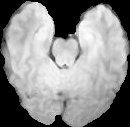

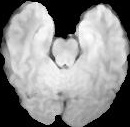

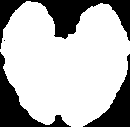

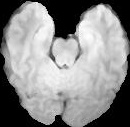

(127, 130, 3) (16510,) (127, 130)
[0 0 0 ... 0 0 0]
Giá trị 0.0 xuất hiện 4569 lần
Giá trị 0.2 xuất hiện 4 lần
Giá trị 0.20392156862745098 xuất hiện 5 lần
Giá trị 0.20784313725490197 xuất hiện 6 lần
Giá trị 0.21176470588235294 xuất hiện 6 lần
Giá trị 0.21568627450980393 xuất hiện 4 lần
Giá trị 0.2196078431372549 xuất hiện 6 lần
Giá trị 0.2235294117647059 xuất hiện 7 lần
Giá trị 0.22745098039215686 xuất hiện 5 lần
Giá trị 0.23137254901960785 xuất hiện 3 lần
Giá trị 0.23529411764705882 xuất hiện 8 lần
Giá trị 0.23921568627450981 xuất hiện 2 lần
Giá trị 0.24313725490196078 xuất hiện 5 lần
Giá trị 0.24705882352941178 xuất hiện 5 lần
Giá trị 0.25098039215686274 xuất hiện 4 lần
Giá trị 0.2549019607843137 xuất hiện 6 lần
Giá trị 0.25882352941176473 xuất hiện 5 lần
Giá trị 0.2627450980392157 xuất hiện 4 lần
Giá trị 0.26666666666666666 xuất hiện 7 lần
Giá trị 0.27058823529411763 xuất hiện 10 lần
Giá trị 0.27450980392156865 xuất hiện 6 lần
Giá trị 0.2784313725490196 xuất hiện 10 lần
Giá trị 0.28

In [ ]:
from google.colab.patches import cv2_imshow
# image_paths[label][0]
image = cv2.imread(image_paths[label][100])
mri_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresholded_image = apply_thresholding(mri_image, threshold_value=50)
image1 = cv2.bitwise_and(image, image, mask=thresholded_image)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
cv2_imshow(image1)
cv2_imshow(image)
cv2_imshow(thresholded_image)
cv2_imshow(mri_image)
image1 = image1.reshape(-1,)
print(image.shape, image1.shape, mri_image.shape)
print(image1)
image1 = image1 / 255.0
unique_values, counts = np.unique(image1, return_counts=True)

# In kết quả
for value, count in zip(unique_values, counts):
    print(f'Giá trị {value} xuất hiện {count} lần')

In [ ]:
X = np.array(X)
Y = np.array(Y)


In [ ]:
unique_values, counts = np.unique(X[0], return_counts=True)

# In kết quả
for value, count in zip(unique_values, counts):
    print(f'Giá trị {value} xuất hiện {count} lần')

Giá trị 0.0 xuất hiện 10048 lần
Giá trị 0.00392156862745098 xuất hiện 186 lần
Giá trị 0.00784313725490196 xuất hiện 47 lần
Giá trị 0.011764705882352941 xuất hiện 22 lần
Giá trị 0.01568627450980392 xuất hiện 15 lần
Giá trị 0.0196078431372549 xuất hiện 18 lần
Giá trị 0.023529411764705882 xuất hiện 25 lần
Giá trị 0.027450980392156862 xuất hiện 21 lần
Giá trị 0.03137254901960784 xuất hiện 20 lần
Giá trị 0.03529411764705882 xuất hiện 23 lần
Giá trị 0.0392156862745098 xuất hiện 27 lần
Giá trị 0.043137254901960784 xuất hiện 18 lần
Giá trị 0.047058823529411764 xuất hiện 14 lần
Giá trị 0.050980392156862744 xuất hiện 23 lần
Giá trị 0.054901960784313725 xuất hiện 26 lần
Giá trị 0.058823529411764705 xuất hiện 19 lần
Giá trị 0.06274509803921569 xuất hiện 20 lần
Giá trị 0.06666666666666667 xuất hiện 14 lần
Giá trị 0.07058823529411765 xuất hiện 24 lần
Giá trị 0.07450980392156863 xuất hiện 9 lần
Giá trị 0.0784313725490196 xuất hiện 18 lần
Giá trị 0.08235294117647059 xuất hiện 9 lần
Giá trị 0.086274509

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir

%matplotlib inline

In [ ]:
# n = 500
# for label in [0,1]:
#   images = X[np.argwhere(Y == label)]
#   n_images = images[:n]
#   columns_n = 10
#   rows_n = int(n/ columns_n)
#   plt.figure(figsize=(20, 10))
#   for image in n_images:
#     plt.subplot(rows_n, columns_n, i)
#     plt.imshow(image[0])
#     plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
#   label_to_str = lambda label: "Yes" if label == 1 else "No"
#   plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
#   plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test_val, Y_train, Y_test_val = train_test_split(X, Y, test_size=0.4)
X_test, X_val, Y_test, Y_val = train_test_split(X_test_val, Y_test_val, test_size=0.5)


print ("number of training examples = " + str(X_train.shape[0]))
print ("number of development examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_val (dev) shape: " + str(X_val.shape))
print ("Y_val (dev) shape: " + str(Y_val.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 2257
number of development examples = 753
number of test examples = 752
X_train shape: (2257, 224, 224)
Y_train shape: (2257,)
X_val (dev) shape: (753, 224, 224)
Y_val (dev) shape: (753,)
X_test shape: (752, 224, 224)
Y_test shape: (752,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
def build_model(input_shape):
    """
    Arugments:
        input_shape: A tuple representing the shape of the input of the model. shape=(image_width, image_height, #_channels)
    Returns:
        model: A Model object.
    """
    # Define the input placeholder as a tensor with shape input_shape.
    X_input = Input(input_shape) # shape=(?, 240, 240, 3)

    # Zero-Padding: pads the border of X_input with zeroes
    # X = ZeroPadding2D((2, 2))(X_input) # shape=(?, 244, 244, 3)
    X = X_input

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X) # shape=(?, 238, 238, 32)

    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool0')(X) # shape=(?, 59, 59, 32)

    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool1')(X) # shape=(?, 14, 14, 32)

    # FLATTEN X
    X = Flatten()(X) # shape=(?, 6272)
    # FULLYCONNECTED
    X = Dense(1, activation='sigmoid', name='fc')(X)  # Dense layer với 1 unit, sử dụng activation sigmoid để phân loại

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='BrainDetectionModel')

    return model
IMG_SHAPE = (224, 224, 1)
model = build_model(IMG_SHAPE)
model.summary()

Model: "BrainDetectionModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv0 (Conv2D)              (None, 218, 218, 32)      1600      
                                                                 
 bn0 (BatchNormalization)    (None, 218, 218, 32)      128       
                                                                 
 activation (Activation)     (None, 218, 218, 32)      0         
                                                                 
 max_pool0 (MaxPooling2D)    (None, 54, 54, 32)        0         
                                                                 
 max_pool1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)      

In [ ]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{round(s,1)}"
def compute_f1_score(y_true, prob):
    # convert the vector of probabilities to a target vector
    y_pred = np.where(prob > 0.5, 1, 0)

    score = f1_score(y_true, y_pred)

    return score

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Model

def create_cnn_model(input_shape, num_filters):
    inputs = Input(shape=input_shape)
    x = Conv2D(num_filters, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(num_filters * 2, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model1 = create_cnn_model((224, 224, 1), 32)
model2 = create_cnn_model((224, 224, 1), 64)
model3 = create_cnn_model((224, 224, 1), 48)

model1.fit(X_train, Y_train, epochs=8, batch_size=32, validation_split=0.2)
model2.fit(X_train, Y_train, epochs=8, batch_size=32, validation_split=0.2)
model3.fit(X_train, Y_train, epochs=8, batch_size=32, validation_split=0.2)

Epoch 1/8
57/57 [==============================] - 180s 3s/step - loss: 0.9035 - accuracy: 0.6992 - val_loss: 0.4334 - val_accuracy: 0.8164
Epoch 2/8
57/57 [==============================] - 173s 3s/step - loss: 0.3347 - accuracy: 0.8576 - val_loss: 0.3335 - val_accuracy: 0.8673
Epoch 3/8
57/57 [==============================] - 163s 3s/step - loss: 0.1885 - accuracy: 0.9280 - val_loss: 0.3732 - val_accuracy: 0.8296
Epoch 4/8
57/57 [==============================] - 168s 3s/step - loss: 0.1172 - accuracy: 0.9612 - val_loss: 0.2755 - val_accuracy: 0.8872
Epoch 5/8
57/57 [==============================] - 177s 3s/step - loss: 0.0512 - accuracy: 0.9861 - val_loss: 0.4038 - val_accuracy: 0.8650
Epoch 6/8
57/57 [==============================] - 187s 3s/step - loss: 0.0197 - accuracy: 0.9961 - val_loss: 0.2977 - val_accuracy: 0.8960
Epoch 7/8
57/57 [==============================] - 177s 3s/step - loss: 0.0097 - accuracy: 0.9983 - val_loss: 0.3140 - val_accuracy: 0.9049
Epoch 8/8
57/57 [===

In [ ]:
y_pred1 = model3.predict(X_test)
y_pred2 = (y_pred1 > 0.2).astype(int)
f1 = f1_score(Y_test, y_pred2)
print(f1)
print(f'F1 Score: {f1}')
for i, j in zip(y_pred1, Y_test):
  print(i, j)

24/24 [==============================] - 29s 1s/step
0.8664772727272727
F1 Score: 0.8664772727272727
[9.584151e-06] 0
[8.782002e-08] 0
[0.99997926] 1
[1.35657765e-05] 0
[0.9999999] 1
[2.3177796e-05] 0
[0.9575395] 1
[0.9999925] 1
[0.98747087] 0
[2.9936915e-09] 0
[1.] 1
[8.419092e-09] 0
[0.00026844] 0
[0.99998206] 1
[1.6268813e-06] 0
[8.406985e-05] 0
[0.9840221] 0
[0.9999997] 1
[3.428129e-07] 0
[0.99998116] 0
[0.01489815] 0
[0.00018879] 0
[0.10444482] 0
[0.9997337] 1
[0.00037577] 0
[0.9999915] 1
[0.9941683] 1
[0.99990815] 1
[0.00020651] 0
[0.9999473] 1
[0.00012508] 0
[0.99931425] 1
[1.9106914e-05] 0
[0.9989177] 0
[0.9999992] 1
[2.7308558e-09] 0
[0.99994886] 0
[0.9999967] 1
[0.00348993] 0
[0.9999857] 1
[0.0009857] 1
[3.601406e-07] 0
[6.490063e-07] 0
[7.813421e-05] 0
[0.9998983] 1
[0.01198451] 0
[0.99594814] 1
[0.97280353] 1
[0.9999609] 1
[0.8102512] 1
[0.9551774] 1
[0.9996384] 1
[0.99762976] 1
[2.1373306e-07] 0
[0.9999859] 1
[0.9999619] 1
[0.9993445] 1
[0.29342407] 1
[0.00050185] 0
[1.] 1

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       428
           1       0.80      0.94      0.87       324

    accuracy                           0.88       752
   macro avg       0.88      0.88      0.87       752
weighted avg       0.89      0.88      0.88       752



In [ ]:
np.unique(Y_train, return_counts=True)

(array([0, 1]), array([1223, 1034]))

In [ ]:
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

def create_ensemble_model(models, input_shape):
    # Create a list to hold all the model outputs
    outputs = []
    # Create a common input layer
    common_input = Input(shape=input_shape)

    # Loop through all models and connect the common input to each
    for i, model in enumerate(models):
        # We assume that each model has its layers cloned with a new name to avoid name clashes
        for layer in model.layers[1:]:  # skip the input layer of each model
            layer._name = f'model_{i}_{layer.name}'

        # Connect the model to the common input and store the output
        outputs.append(model(common_input))

    # Concatenate all outputs
    if len(outputs) > 1:
        combined_output = concatenate(outputs)
    else:
        combined_output = outputs[0]

    # Add a dense layer to learn from all combined outputs
    y = Dense(64, activation='relu')(combined_output)
    y = Dense(1, activation='sigmoid')(y)

    # Create the final model
    model = Model(inputs=common_input, outputs=y)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Assuming model1, model2, model3 are already created and compiled
ensemble_model = create_ensemble_model([model1, model2, model3], (224, 224, 1))
ensemble_model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 model (Functional)          (None, 1)                    1196288   ['input_5[0][0]']             
                                                          1                                       
                                                                                                  
 model_1 (Functional)        (None, 1)                    2396249   ['input_5[0][0]']             
                                                          7                                       
                                                                                            

In [ ]:
evaluation = ensemble_model.evaluate(X_val, Y_val)
print(f"Loss: {evaluation[0]}, Accuracy: {evaluation[1]}")

24/24 [==============================] - 90s 4s/step - loss: 0.6902 - accuracy: 0.5286
Loss: 0.6901527047157288, Accuracy: 0.5285524725914001


In [ ]:
# Train the ensemble model
ensemble_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

# Evaluate the model
performance = ensemble_model.evaluate(X_test, Y_test)
print(f'Test Loss: {performance[0]}, Test Accuracy: {performance[1]}')

Epoch 1/10
71/71 [==============================] - 1161s 16s/step - loss: 0.5468 - accuracy: 0.9269 - val_loss: 0.5139 - val_accuracy: 0.8778
Epoch 2/10
71/71 [==============================] - 1114s 16s/step - loss: 0.3527 - accuracy: 0.9796 - val_loss: 0.4087 - val_accuracy: 0.8738
Epoch 3/10
71/71 [==============================] - 1033s 15s/step - loss: 0.2185 - accuracy: 0.9836 - val_loss: 0.3397 - val_accuracy: 0.8725
Epoch 4/10
71/71 [==============================] - 1085s 15s/step - loss: 0.1481 - accuracy: 0.9765 - val_loss: 0.2983 - val_accuracy: 0.8752
Epoch 5/10
71/71 [==============================] - 1099s 15s/step - loss: 0.0890 - accuracy: 0.9903 - val_loss: 0.3215 - val_accuracy: 0.8818
Epoch 6/10
71/71 [==============================] - 1100s 16s/step - loss: 0.0568 - accuracy: 0.9925 - val_loss: 0.3249 - val_accuracy: 0.8898
Epoch 7/10
71/71 [==============================] - 1095s 15s/step - loss: 0.0426 - accuracy: 0.9938 - val_loss: 0.3896 - val_accuracy: 0.8672

In [ ]:
# Predict and calculate F1 score
y_pred = ensemble_model.predict(X_test)
for i, j in zip(y_pred, Y_test):
  print(i, j)
y_pred = (y_pred>0.5 ).astype(int)
for i, j in zip(y_pred, Y_test):
  print(i, j)
f1 = f1_score(Y_test, y_pred)
print(f'F1 Score: {f1}')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

In [ ]:
# def plot_metrics(history):

#     train_loss = history['loss']
#     val_loss = history['val_loss']
#     train_acc = history['accuracy']
#     val_acc = history['val_accuracy']

#     # Loss
#     plt.figure()
#     plt.plot(train_loss, label='Training Loss')
#     plt.plot(val_loss, label='Validation Loss')
#     plt.title('Loss')
#     plt.legend()
#     plt.show()

#     # Accuracy
#     plt.figure()
#     plt.plot(train_acc, label='Training Accuracy')
#     plt.plot(val_acc, label='Validation Accuracy')
#     plt.title('Accuracy')
#     plt.legend()
#     plt.show()

In [ ]:
def plot_metrics(history):
    # Adjust the keys according to what is printed by the `print` statement above
    train_loss = history.get('loss', [])
    val_loss = history.get('val_loss', [])
    train_acc = history.get('accuracy', history.get('acc', []))
    val_acc = history.get('val_accuracy', history.get('val_acc', []))

    if not train_loss or not train_acc:
        print("Loss or accuracy metrics are missing in history.")
        return

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

# Gọi hàm với đối số là ensemble_model.history.history
plot_metrics(ensemble_model.history.history)

#Resnet18

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = transform(image)
    image = image.unsqueeze(0)
    return image.to(device)

In [ ]:
def extract_features(image, model):
    with torch.no_grad():
        feature = model(image).squeeze().cpu().numpy()
    return feature

In [ ]:
def extract_features_from_image(image_path, model):
    image = preprocess_image(image_path)
    feature = extract_features(image, model)
    return feature

In [ ]:
resnet18_model = resnet18(pretrained=True)
resnet18_model = nn.Sequential(*list(resnet18_model.children())[:-1])
resnet18_model = resnet18_model.to(device)
resnet18_model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 82.5MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [ ]:
features_resnet18 = []
for image_path in tqdm(image_paths):
  features_resnet18.append(extract_features_from_image(image_path, resnet18_model))